In [1]:
%matplotlib inline

In [43]:
from matplotlib import pyplot as plt
from Bio import SeqIO
from collections import Counter
import pandas as pd

In [3]:
# target_list = ['NGO0025']
target_list = ['NGO1623', 'NGO1123', 'NGO0472']

In [4]:
genome_list = list(SeqIO.parse('../Data/Genomes/fa1090.gb', 'genbank'))
sequence_dict = {}
for genome in genome_list:
    for feature in genome.features:
        if feature.type == 'CDS':
            if feature.qualifiers['locus_tag'][0] in target_list:
                sequence_dict[feature.qualifiers['locus_tag'][0]] = str(feature.extract(genome).seq)

In [5]:
generic_sam_file = 'SQ4'
generic_sam_loc = '/Users/adamhockenberry/workspace/kallisto/neisseria_04_20_17/{}.sam'.format(generic_sam_file)

fwd_dicty = {}
rev_dicty = {}
fwd_dicty_unique = {}
rev_dicty_unique = {}
for gene in target_list:
    fwd_dicty[gene] = {}
    rev_dicty[gene] = {}
    fwd_dicty_unique[gene] = {}
    rev_dicty_unique[gene] = {}

In [6]:
relevant_reads = []
with open(generic_sam_loc, 'r') as infile:
    for line in infile:
        if line[0] == '@':
            continue
        split_line = line.split('\t')
        gene = split_line[2]
        if gene in target_list:
            if split_line[1] == '0' or split_line[1] == '16':
                relevant_reads.append(split_line)

read_ids = [split_line[0] for split_line in relevant_reads]
counter_dict = Counter(read_ids)

In [7]:
for split_line in relevant_reads:
    gene = split_line[2]
    seq = split_line[9] #In the sam file position 10 (index 9) should contain the mapped sequence
    start_loc = int(split_line[3])-1 #I noticed the subtraction of one is necessary for proper mapping
    end_loc = start_loc+len(seq)
    if split_line[1] == '0':
        for i in range(start_loc, end_loc + 1):
            try:
                fwd_dicty[gene][i] += 1
            except KeyError:
                fwd_dicty[gene][i] = 1
    elif split_line[1] == '16':
        for i in range(start_loc, end_loc + 1):
            try:
                rev_dicty[gene][i] += 1
            except KeyError:
                rev_dicty[gene][i] = 1
                    
                    
for split_line in relevant_reads:
    if counter_dict[split_line[0]] == 1:
        gene = split_line[2]
        seq = split_line[9] #In the sam file position 10 (index 9) should contain the mapped sequence
        start_loc = int(split_line[3])-1 #I noticed the subtraction of one is necessary for proper mapping
        end_loc = start_loc+len(seq)
        if split_line[1] == '0':
            for i in range(start_loc, end_loc + 1):
                try:
                    fwd_dicty_unique[gene][i] += 1
                except KeyError:
                    fwd_dicty_unique[gene][i] = 1
        elif split_line[1] == '16':
            for i in range(start_loc, end_loc + 1):
                try:
                    rev_dicty_unique[gene][i] += 1
                except KeyError:
                    rev_dicty_unique[gene][i] = 1

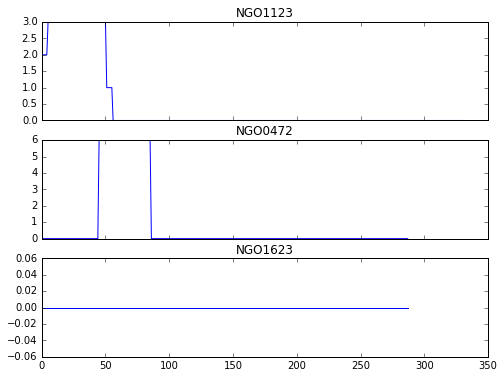

In [21]:
# fwd_dict_list = {}
# for gene_name in target_list:
#     x_vals = []
#     y_vals = []
#     for i in range(0, len(sequence_dict[gene_name])):
#         try:
#             y_vals.append(fwd_dicty_unique[gene_name][i])
#             x_vals.append(i)
#         except:
#             y_vals.append(0)
#             x_vals.append(i)
#     fwd_dict_list[gene_name] = (x_vals, y_vals)

# fig, ax = plt.subplots(len(target_list), sharex=True, figsize=(8,6))
# for i, gene_name in enumerate(fwd_dict_list.keys()):
# #     ax = fig.add_subplot(len(target_list), 1, i+1)
#     ax[i].plot(fwd_dict_list[gene_name][0], fwd_dict_list[gene_name][1])
#     ax[i].set_title(gene_name)

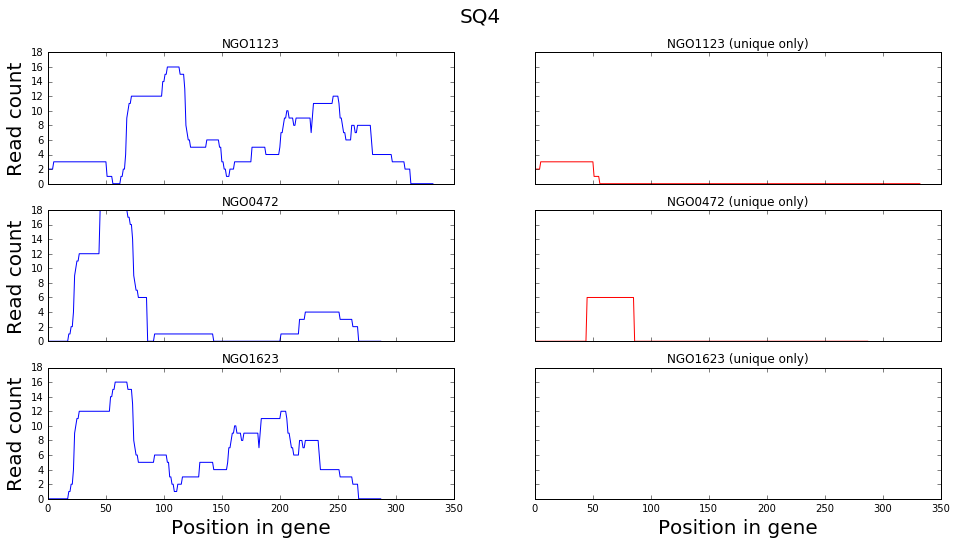

In [37]:
fwd_dict_list = {}
fwd_dict_list_unique = {}
for gene_name in target_list:
    x_vals = []
    y_vals = []
    for i in range(0, len(sequence_dict[gene_name])):
        try:
            y_vals.append(fwd_dicty[gene_name][i])
            x_vals.append(i)
        except:
            y_vals.append(0)
            x_vals.append(i)
    fwd_dict_list[gene_name] = (x_vals, y_vals)
    
    x_vals = []
    y_vals = []
    for i in range(0, len(sequence_dict[gene_name])):
        try:
            y_vals.append(fwd_dicty_unique[gene_name][i])
            x_vals.append(i)
        except:
            y_vals.append(0)
            x_vals.append(i)
    fwd_dict_list_unique[gene_name] = (x_vals, y_vals)

fig, ax = plt.subplots(len(target_list), 2, sharex=True, sharey=True, figsize=(16,8))
for i, gene_name in enumerate(fwd_dict_list.keys()):
    ax[i,0].plot(fwd_dict_list[gene_name][0], fwd_dict_list[gene_name][1])
    ax[i,0].set_title('{}'.format(gene_name))
    ax[i,0].set_ylabel('Read count', fontsize=20)
    ax[i,1].plot(fwd_dict_list_unique[gene_name][0], fwd_dict_list_unique[gene_name][1], 'r-')
    ax[i,1].set_title('{} (unique only)'.format(gene_name))

ax[len(target_list)-1,0].set_xlabel('Position in gene', fontsize=20)
ax[len(target_list)-1,1].set_xlabel('Position in gene', fontsize=20)
fig.suptitle('{}'.format(generic_sam_file), fontsize=20)
plt.savefig('/Users/adamhockenberry/Projects/Neisseria/Results/2017_04_20/{}_{}.png'.format(target_list[0], generic_sam_file))

# Putting humpty all together just to get some results quickly-ish

In [48]:
# ## First get the total number of reads and nts for normalization (Only do this once!)
# generic_sam_file_list = ['SQ1', 'SQ2','SQ3','SQ4','SQ5','SQ6']
# df = pd.DataFrame(columns=['Total_Reads', 'Total_nt_Reads'], index=generic_sam_file_list)
# for generic_sam_file in generic_sam_file_list:
#     generic_sam_loc = '/Users/adamhockenberry/workspace/kallisto/neisseria_04_20_17/{}.sam'.format(generic_sam_file)
#     total_reads = 0
#     total_nt_reads = 0
#     with open(generic_sam_loc, 'r') as infile:
#         for line in infile:
#             if line[0] == '@':
#                 continue
#             split_line = line.split('\t')
#             if split_line[1] == '0' or split_line[1] == '16':
#                 total_reads += 1  
#                 total_nt_reads += len(split_line[9])
#     df.set_value(generic_sam_file, 'Total_Reads', total_reads)
#     df.set_value(generic_sam_file, 'Total_nt_Reads', total_nt_reads)
# df.to_csv('/Users/adamhockenberry/workspace/kallisto/neisseria_04_20_17/total_reads.tsv', sep='\t')

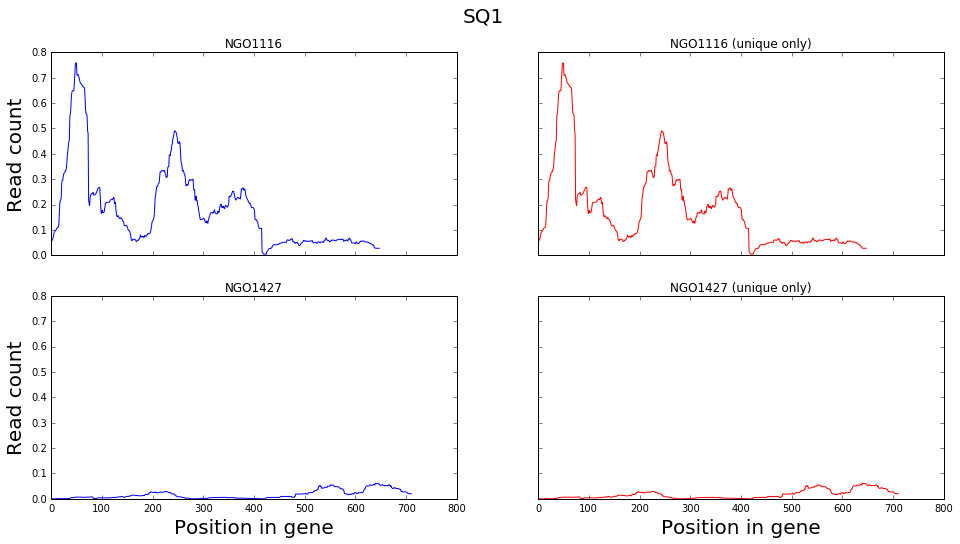

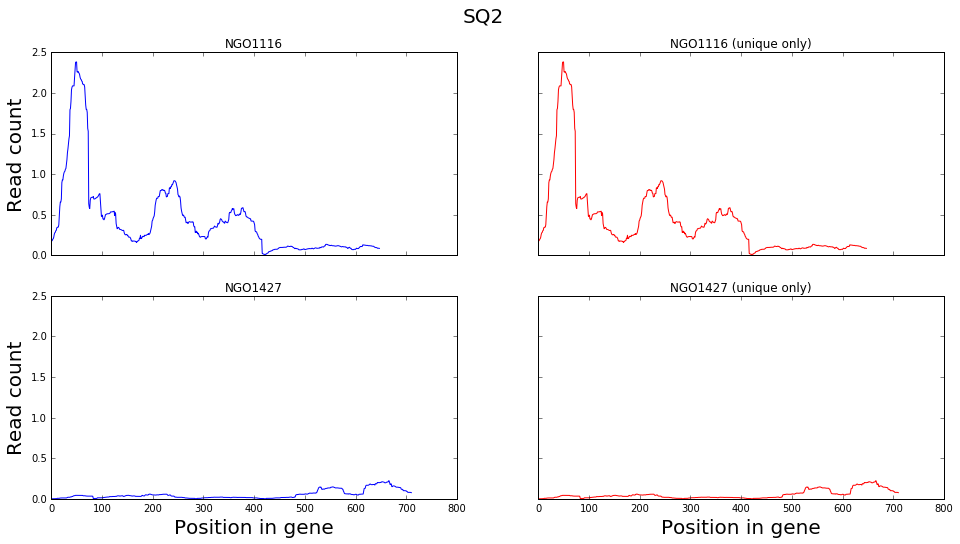

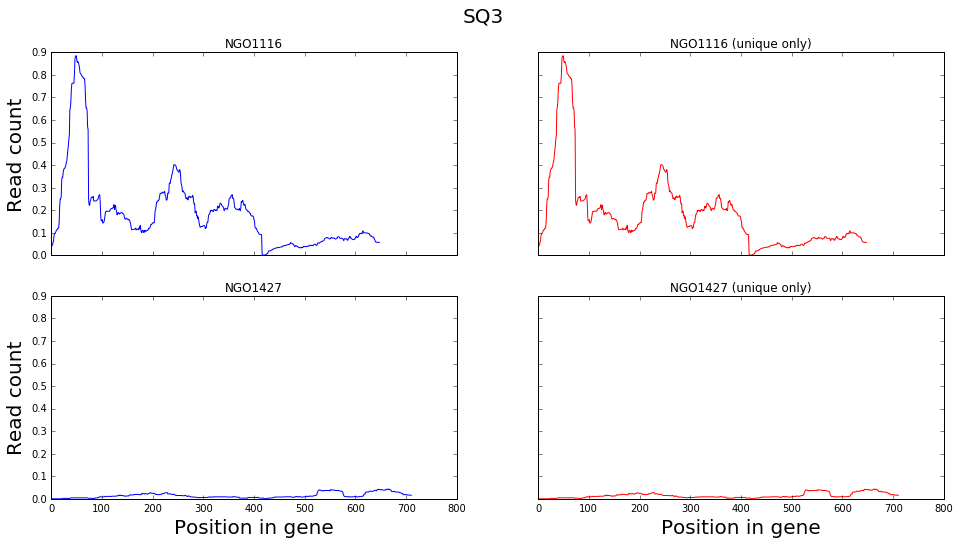

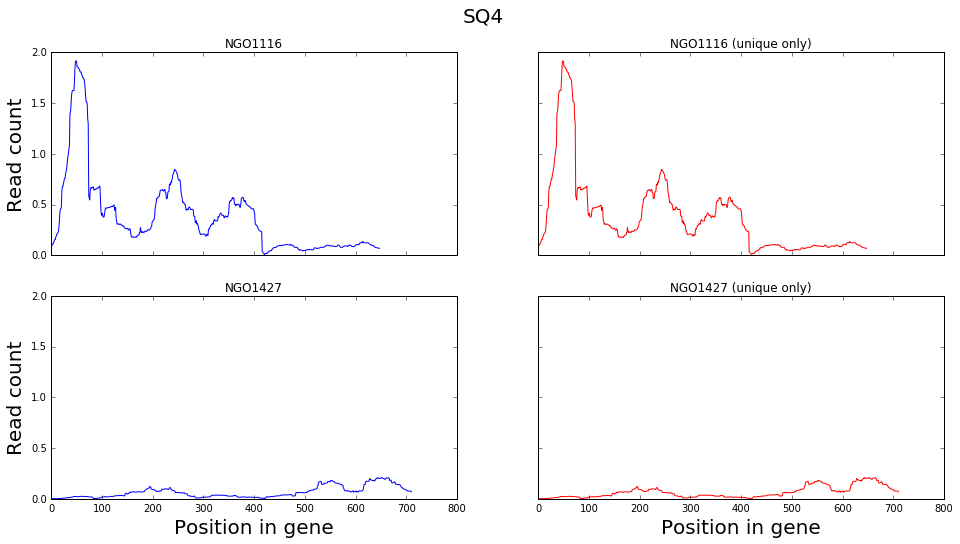

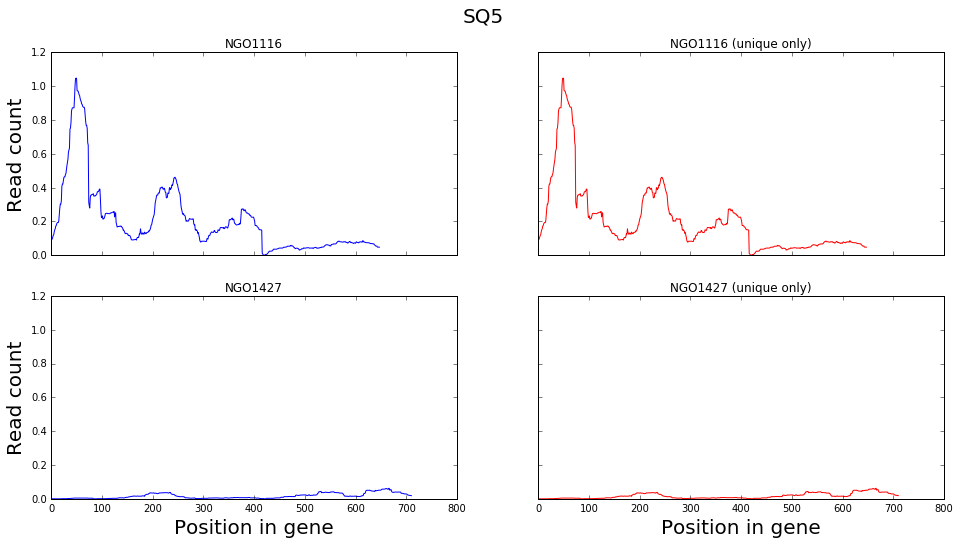

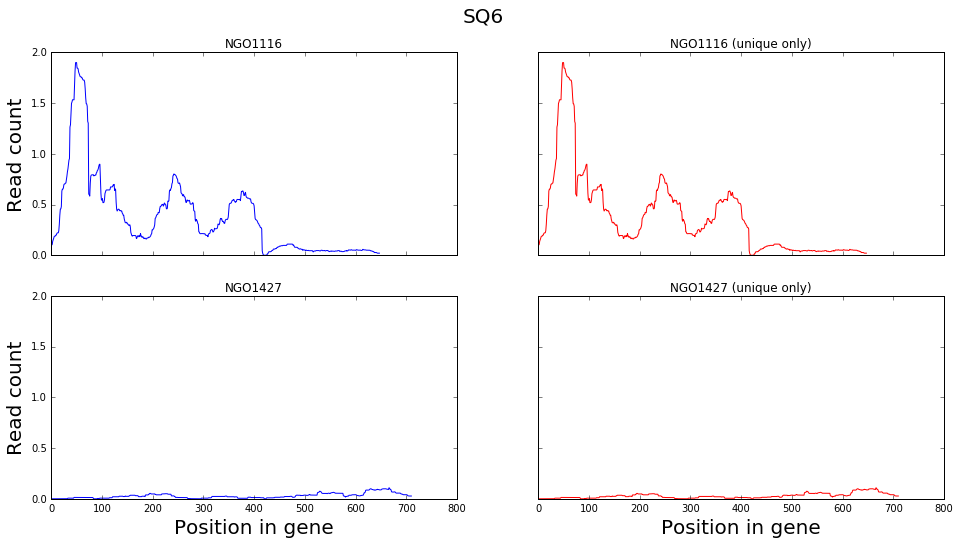

In [54]:
##########################################
###Change me depending on what I'm interested in
# target_list = ['NGO1623', 'NGO1123', 'NGO0472']
target_list = ['NGO1116', 'NGO1427']

##########################################
####Get the sequences
genome_list = list(SeqIO.parse('../Data/Genomes/fa1090.gb', 'genbank'))
sequence_dict = {}
for genome in genome_list:
    for feature in genome.features:
        if feature.type == 'CDS':
            if feature.qualifiers['locus_tag'][0] in target_list:
                sequence_dict[feature.qualifiers['locus_tag'][0]] = str(feature.extract(genome).seq)
##########################################
####Get total reads per condition
reads_df = pd.read_csv('/Users/adamhockenberry/workspace/kallisto/neisseria_04_20_17/total_reads.tsv', sep='\t', index_col=0)                
##########################################
####Establish my list                
generic_sam_file_list = ['SQ1', 'SQ2','SQ3','SQ4','SQ5','SQ6']
   
##########################################
####Start the loop through each sample
for generic_sam_file in generic_sam_file_list:
    generic_sam_loc = '/Users/adamhockenberry/workspace/kallisto/neisseria_04_20_17/{}.sam'.format(generic_sam_file)
    ##########################################
    ####Starting blank dictionaries to keep track of things
    fwd_dicty = {}
    rev_dicty = {}
    fwd_dicty_unique = {}
    rev_dicty_unique = {}
    for gene in target_list:
        fwd_dicty[gene] = {}
        rev_dicty[gene] = {}
        fwd_dicty_unique[gene] = {}
        rev_dicty_unique[gene] = {}
    ##########################################
    ####Getting total reads for normalization
    total_reads = reads_df.loc[generic_sam_file]['Total_Reads']
    ##########################################
    ####Only extract the ones that map to the loci of interest
    relevant_reads = []
    with open(generic_sam_loc, 'r') as infile:
        for line in infile:
            if line[0] == '@':
                continue
            split_line = line.split('\t')
            gene = split_line[2]
            if gene in target_list:
                if split_line[1] == '0' or split_line[1] == '16':
                    relevant_reads.append(split_line)
    read_ids = [split_line[0] for split_line in relevant_reads]
    counter_dict = Counter(read_ids)
    ##########################################
    ####Assign those reads
    for split_line in relevant_reads:
        gene = split_line[2]
        seq = split_line[9] 
        start_loc = int(split_line[3])-1 
        end_loc = start_loc+len(seq)
        to_add = (1/len(seq))/(total_reads/1000000)
        if split_line[1] == '0':
            for i in range(start_loc, end_loc + 1):
                try:
                    fwd_dicty[gene][i] += to_add
                except KeyError:
                    fwd_dicty[gene][i] = to_add
        elif split_line[1] == '16':
            for i in range(start_loc, end_loc + 1):
                try:
                    rev_dicty[gene][i] += to_add
                except KeyError:
                    rev_dicty[gene][i] = to_add

    ##########################################
    ####Now only assign the unique reads
    for split_line in relevant_reads:
        if counter_dict[split_line[0]] == 1:
            gene = split_line[2]
            seq = split_line[9]
            start_loc = int(split_line[3])-1 
            end_loc = start_loc+len(seq)
            to_add = (1/len(seq))/(total_reads/1000000)
            if split_line[1] == '0':
                for i in range(start_loc, end_loc + 1):
                    try:
                        fwd_dicty_unique[gene][i] += to_add
                    except KeyError:
                        fwd_dicty_unique[gene][i] = to_add
            elif split_line[1] == '16':
                for i in range(start_loc, end_loc + 1):
                    try:
                        rev_dicty_unique[gene][i] += to_add
                    except KeyError:
                        rev_dicty_unique[gene][i] = to_add
    ##########################################
    ####Messy plotting                   
    fwd_dict_list = {}
    fwd_dict_list_unique = {}
    for gene_name in target_list:
        x_vals = []
        y_vals = []
        for i in range(0, len(sequence_dict[gene_name])):
            try:
                y_vals.append(fwd_dicty[gene_name][i])
                x_vals.append(i)
            except:
                y_vals.append(0)
                x_vals.append(i)
        fwd_dict_list[gene_name] = (x_vals, y_vals)

        x_vals = []
        y_vals = []
        for i in range(0, len(sequence_dict[gene_name])):
            try:
                y_vals.append(fwd_dicty_unique[gene_name][i])
                x_vals.append(i)
            except:
                y_vals.append(0)
                x_vals.append(i)
        fwd_dict_list_unique[gene_name] = (x_vals, y_vals)

    fig, ax = plt.subplots(len(target_list), 2, sharex=True, sharey=True, figsize=(16,8))
    for i, gene_name in enumerate(fwd_dict_list.keys()):
        ax[i,0].plot(fwd_dict_list[gene_name][0], fwd_dict_list[gene_name][1])
        ax[i,0].set_title('{}'.format(gene_name))
        ax[i,0].set_ylabel('Read count', fontsize=20)
        ax[i,1].plot(fwd_dict_list_unique[gene_name][0], fwd_dict_list_unique[gene_name][1], 'r-')
        ax[i,1].set_title('{} (unique only)'.format(gene_name))

    ax[len(target_list)-1,0].set_xlabel('Position in gene', fontsize=20)
    ax[len(target_list)-1,1].set_xlabel('Position in gene', fontsize=20)
    fig.suptitle('{}'.format(generic_sam_file), fontsize=20)
    plt.savefig('/Users/adamhockenberry/Projects/Neisseria/Results/2017_04_20/{}_{}.png'.format(target_list[0], generic_sam_file))